In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt
from matplotlib import style
df=pd.read_csv('a.us.txt', header=0, 
                  index_col='Date',
                  parse_dates=True)
import pickle

In [2]:
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1999-11-19,28.986,29.027,26.872,27.257,16142920,0
1999-11-22,27.886,29.702,27.044,29.702,6970266,0
1999-11-23,28.688,29.446,27.002,27.002,6332082,0
1999-11-24,27.083,28.309,27.002,27.717,5132147,0


In [3]:
df['HL_PCT']=(df['High']-df['Close'])/df['Close']
df['PCT_change']=(df['Close']-df['Open'])/df['Open']

In [4]:
df=df[['Close','HL_PCT','PCT_change','Volume']]

In [5]:
df.head()

,Close,HL_PCT,PCT_change,Volume
Date,,,,
1999-11-18,29.702,0.136422,-0.032918,66277506
1999-11-19,27.257,0.064937,-0.059649,16142920
1999-11-22,29.702,0.000000,0.065122,6970266
1999-11-23,27.002,0.090512,-0.058770,6332082
1999-11-24,27.717,0.021359,0.023410,5132147


In [6]:
forecast_col='Close'
df.fillna(-99999, inplace=True)

In [7]:
forecast_out=int(math.ceil(0.01*len(df)))
df['Label']=df[forecast_col].shift(-forecast_out)

In [8]:
df.head()

,Close,HL_PCT,PCT_change,Volume,Label
Date,,,,,
1999-11-18,29.702,0.136422,-0.032918,66277506,46.111
1999-11-19,27.257,0.064937,-0.059649,16142920,46.199
1999-11-22,29.702,0.000000,0.065122,6970266,45.942
1999-11-23,27.002,0.090512,-0.058770,6332082,44.681
1999-11-24,27.717,0.021359,0.023410,5132147,47.928


In [9]:
X=np.array(df.drop(['Label'],1))
X=preprocessing.scale(X)
X_lately=X[-forecast_out:]
X=X[:-forecast_out]
df.dropna(inplace=True)
y=np.array(df['Label'])


In [10]:
print(len(X), len(y))

4475 4475


In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [12]:
model=LinearRegression()
#model=svm.SVR()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
with open('reg.pickle', 'wb') as file:
    pickle.dump(model, file)

In [15]:
pickle_in =open('reg.pickle', 'rb')
model=pickle.load(pickle_in)

In [16]:
accuracy=model.score(X_test, y_test)

In [17]:
accuracy

0.7185788479927036

In [18]:
forecast_set=model.predict(X_lately)

In [19]:
print(forecast_set, accuracy, forecast_out)

[63.94427911 65.06492643 65.40765324 64.31489754 64.77748665 64.97826628
 65.27871305 65.39255293 65.39397614 65.21592674 64.84899314 63.58399851
 63.13539947 63.62641301 63.10941496 63.51779136 64.00232493 64.18247892
 65.15326154 64.98271574 65.59684881 65.83975183 65.95838175 65.79505402
 66.56438078 66.11190834 66.12176973 65.36223554 65.84395117 66.11315643
 66.45006228 66.14785215 66.50471201 66.06299976 66.97889788 67.29181619
 66.8343831  67.10916804 67.18190604 67.25717489 67.46947107 67.5094998
 67.43978921 67.41279451 66.64683398 65.83483167] 0.7185788479927036 46


In [20]:
df['forecast']=np.nan
df

,Close,HL_PCT,PCT_change,Volume,Label,forecast
Date,,,,,,
1999-11-18,29.702,0.136422,-0.032918,66277506,46.111,NaN
1999-11-19,27.257,0.064937,-0.059649,16142920,46.199,NaN
1999-11-22,29.702,0.000000,0.065122,6970266,45.942,NaN
1999-11-23,27.002,0.090512,-0.058770,6332082,44.681,NaN
1999-11-24,27.717,0.021359,0.023410,5132147,47.928,NaN
...,...,...,...,...,...,...
2017-08-31,64.589,0.001703,0.011257,1933987,68.220,NaN
2017-09-01,64.250,0.012420,-0.008013,1227152,68.250,NaN
2017-09-05,64.160,0.002946,0.004226,912461,68.110,NaN


In [21]:
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix + one_day

In [22]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]

Text(0, 0.5, 'Price')

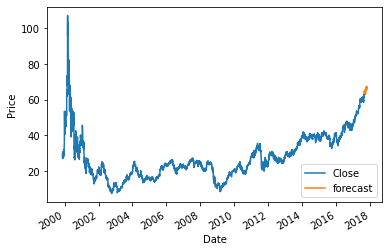

In [24]:
df['Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')